In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import gym

from rlemmc import environment, policy, trajectory, montecarlo

In [2]:
# Environment
horizon = 200
env = environment.CartPoleEnvironment()

[2017-05-16 23:41:44,786] Making new env: CartPole-v0


In [3]:
# Inference
sampleCount = 100
iterationCount = 50
selectedInference = montecarlo.importance_sampling

In [4]:
# Policy
kNearest = 3
policySampleCount = 10
p = policy.KnnPolicyDiscrete(kNearest)

In [5]:
def plot_trajectories(states, color='red'):

    [sample_count, _, _] = states.shape

    for s in range(sample_count):
        plt.plot(states[s, :, 0], states[s, :, 2], '-', color=color)
        # plt.plot(states[s, :, 0], states[s, :, 2], 'o', color=color)
        plt.plot(states[s, -1, 0], states[s, -1, 2], 'o', color=color)

In [6]:
def plot_iteration(states, newStates):
    plot_trajectories(states, color='red')
    plot_trajectories(newStates, color='green')
    
    plt.vlines(0, -0.25, 0.25, linestyle='dotted')
    # plt.vlines(2.4, -0.25, 0.25, linestyle='dotted')
    # plt.vlines(-2.4, -0.25, 0.25, linestyle='dotted')
    
    plt.hlines(0, -2.4, 2.4, linestyle='dotted')
    plt.hlines(0.25, -2.4, 2.4, linestyle='dotted')
    plt.hlines(-0.25, -2.4, 2.4, linestyle='dotted')
    
    plt.grid()
    plt.show()

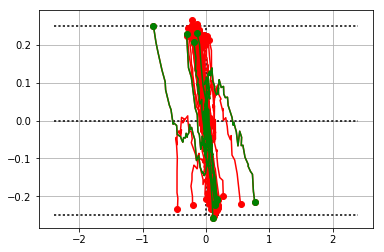

Iteration 1 - Average Reward : 22.61


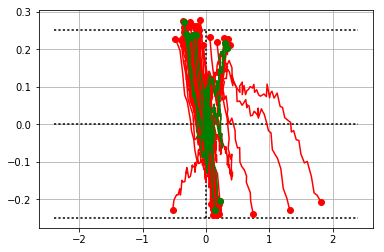

Iteration 2 - Average Reward : 38.190000000000005


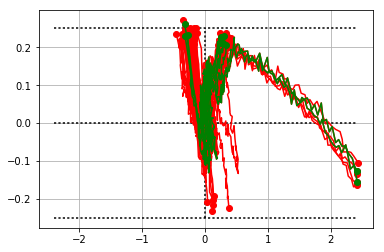

Iteration 3 - Average Reward : 60.0


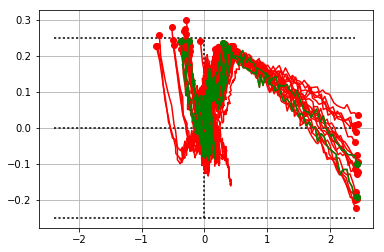

Iteration 4 - Average Reward : 87.35000000000001


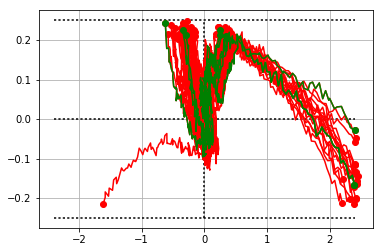

Iteration 5 - Average Reward : 88.24


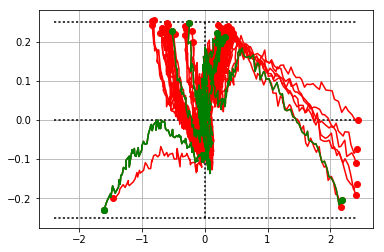

Iteration 6 - Average Reward : 78.33


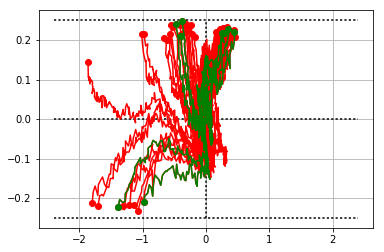

Iteration 7 - Average Reward : 71.15


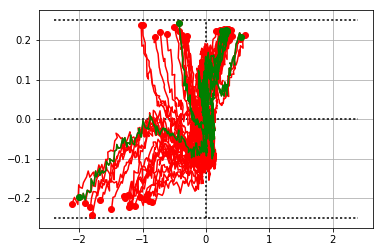

Iteration 8 - Average Reward : 81.64


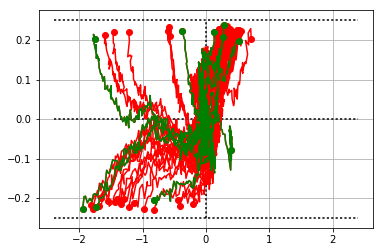

Iteration 9 - Average Reward : 93.33


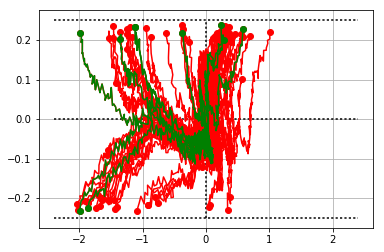

Iteration 10 - Average Reward : 105.28


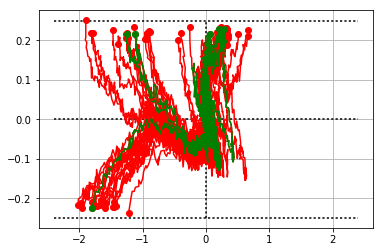

Iteration 11 - Average Reward : 97.38


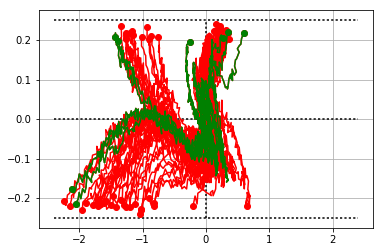

Iteration 12 - Average Reward : 108.38000000000001


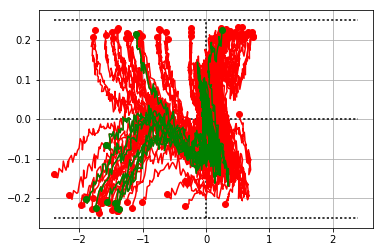

Iteration 13 - Average Reward : 147.3


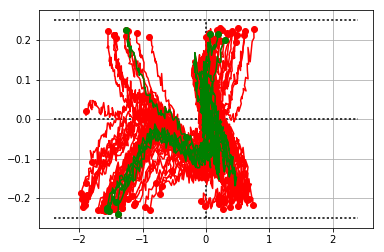

Iteration 14 - Average Reward : 147.07


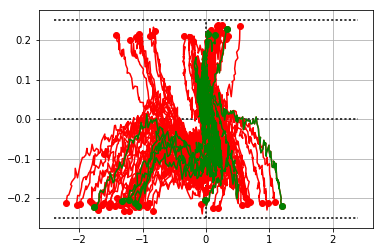

Iteration 15 - Average Reward : 137.63


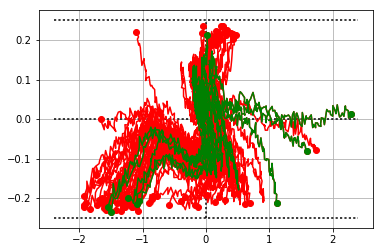

Iteration 16 - Average Reward : 154.14000000000001


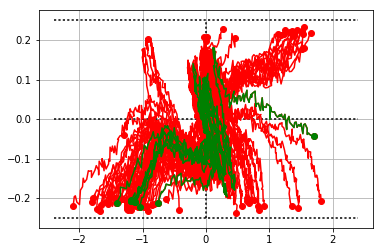

Iteration 17 - Average Reward : 157.29999999999998


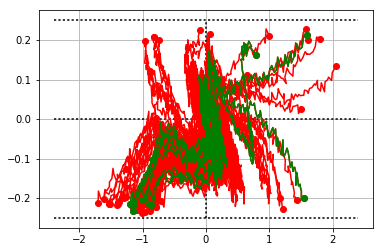

Iteration 18 - Average Reward : 155.42000000000002


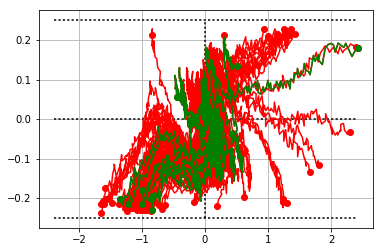

Iteration 19 - Average Reward : 150.47


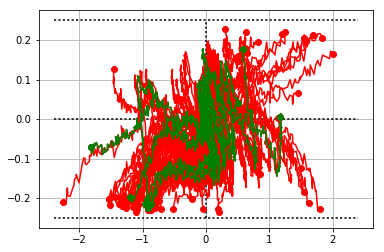

Iteration 20 - Average Reward : 153.70999999999998


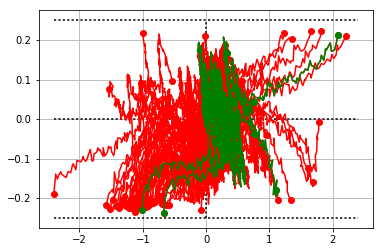

Iteration 21 - Average Reward : 166.82


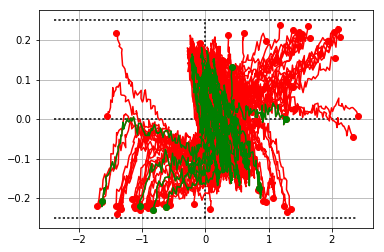

Iteration 22 - Average Reward : 174.62


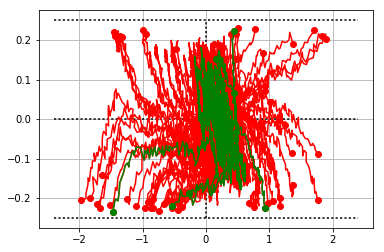

Iteration 23 - Average Reward : 182.0


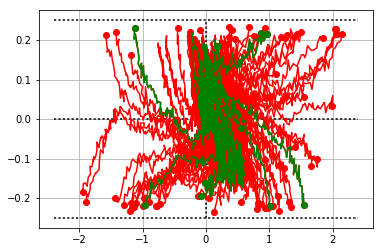

Iteration 24 - Average Reward : 175.34


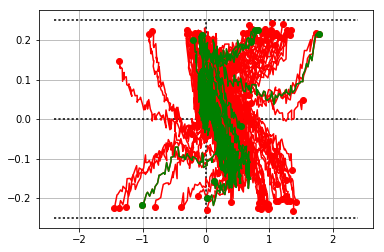

Iteration 25 - Average Reward : 171.48000000000002


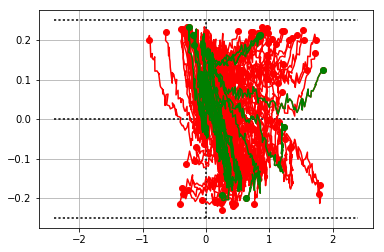

Iteration 26 - Average Reward : 156.51


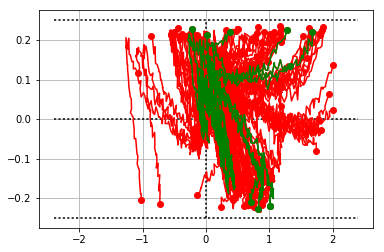

Iteration 27 - Average Reward : 165.6


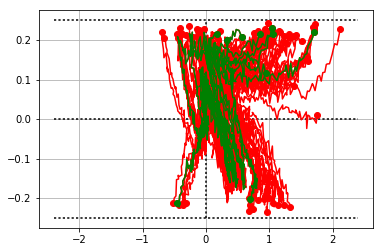

Iteration 28 - Average Reward : 158.81


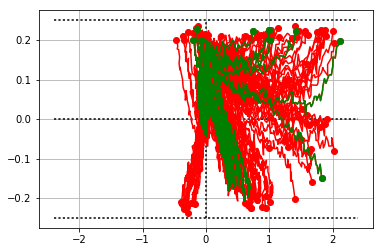

Iteration 29 - Average Reward : 152.16


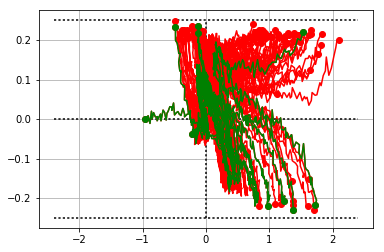

Iteration 30 - Average Reward : 149.10000000000002


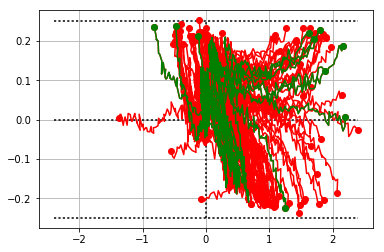

Iteration 31 - Average Reward : 156.76000000000002


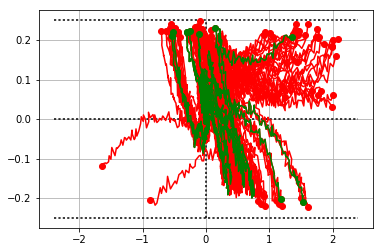

Iteration 32 - Average Reward : 143.77


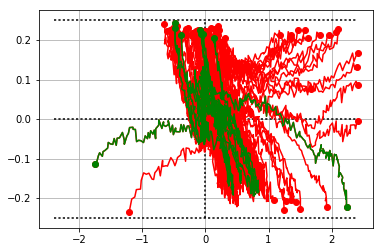

Iteration 33 - Average Reward : 135.89


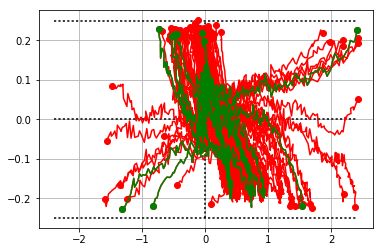

Iteration 34 - Average Reward : 133.35


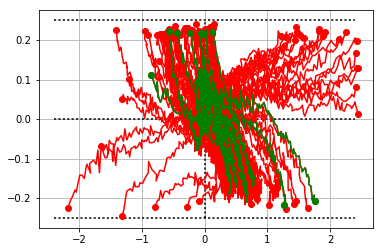

Iteration 35 - Average Reward : 131.91


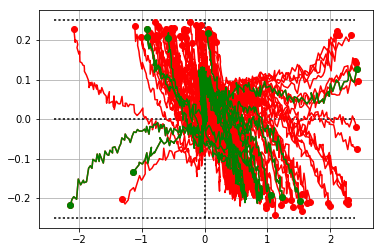

Iteration 36 - Average Reward : 138.9


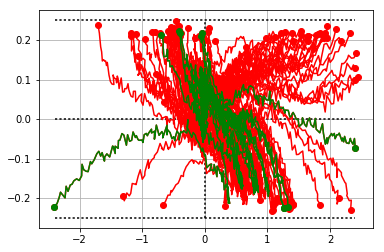

Iteration 37 - Average Reward : 132.66


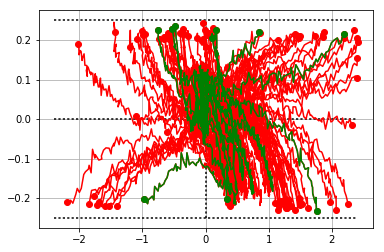

Iteration 38 - Average Reward : 142.34


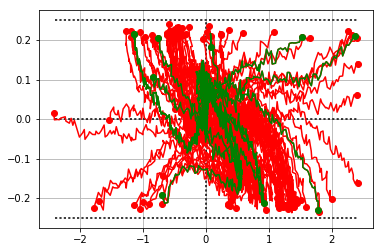

Iteration 39 - Average Reward : 138.66


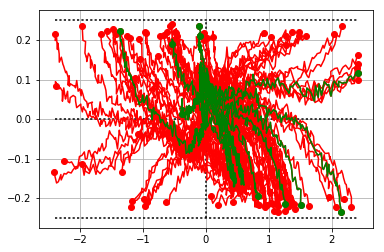

Iteration 40 - Average Reward : 144.08


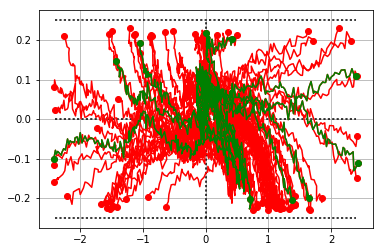

Iteration 41 - Average Reward : 136.97


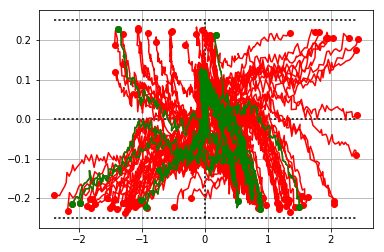

Iteration 42 - Average Reward : 144.25


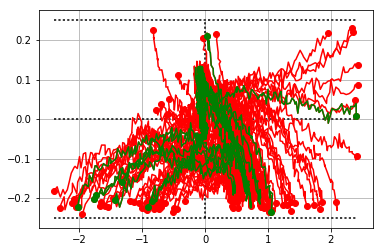

Iteration 43 - Average Reward : 141.01999999999998


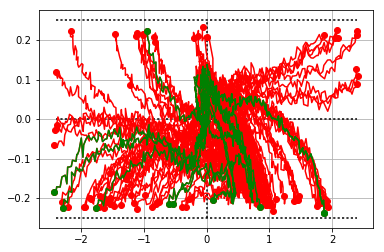

Iteration 44 - Average Reward : 145.97


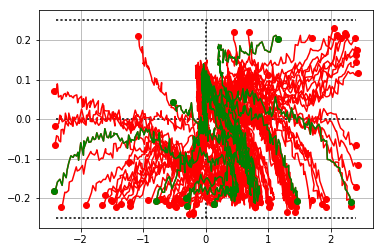

Iteration 45 - Average Reward : 138.72


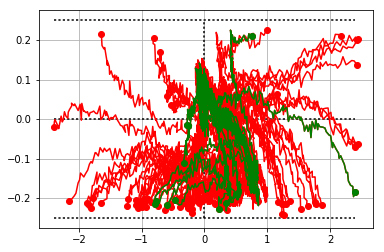

Iteration 46 - Average Reward : 136.8


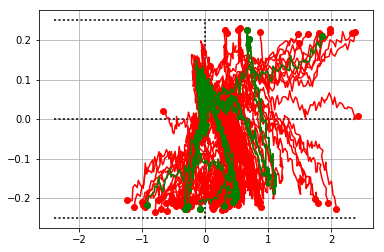

Iteration 47 - Average Reward : 124.64


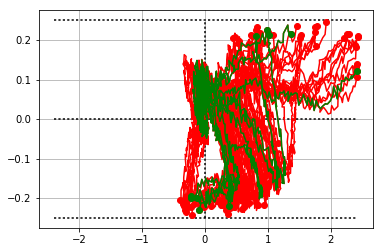

Iteration 48 - Average Reward : 124.41


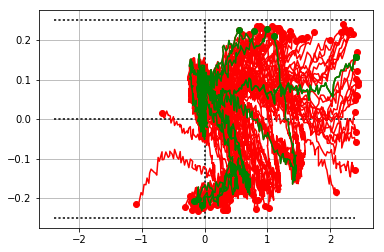

Iteration 49 - Average Reward : 131.69


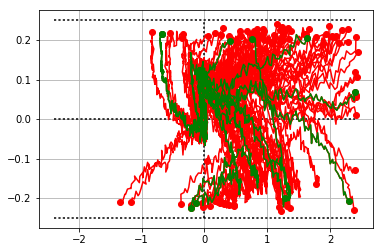

Iteration 50 - Average Reward : 122.83


In [7]:
iterationRewards = []

for i in range(iterationCount):

    if i == 0:
        iterationPolicy = policy.UniformPolicyDiscrete(range(env.openAI.action_space.n))
    else:
        iterationPolicy = p

    [states, actions, rewards] = \
        trajectory.rollout_trajectories(env, iterationPolicy, horizon, sampleCount)

    # E-Step
    [newStates, newActions] = selectedInference(states, actions, np.sum(rewards, axis=1), policySampleCount)

    # M-Step
    p.m_step(newStates, newActions)
    
    # Plot Trajectories
    plot_iteration(states, newStates)
        
    # Average Reward
    iterationRewards.append(np.mean(rewards) * horizon)
    print( f'Iteration {i+1} - Average Reward : {iterationRewards[i]}' )

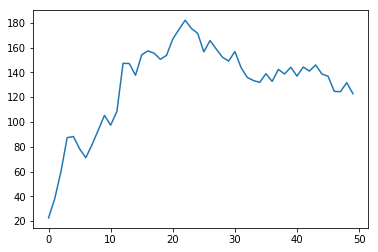

In [8]:
plt.plot(iterationRewards)
plt.show()